In [2]:
from selenium import webdriver
from time import sleep
import urllib
from selenium.webdriver.chrome.options import Options
from os import listdir,path,rename,walk,makedirs
from bs4 import BeautifulSoup
import requests

In [3]:
save_path = 'C:/Users/Tingchun.TC.Hung/Desktop/Record/PCR Electrophoresis/'

## 爬下所有圖片 ver1

In [12]:
target = input('請輸入關鍵字')

chrome_options=Options()
chrome_options.add_argument('--headless')#無介面操作
driver = webdriver.Chrome(chrome_options=chrome_options)
driver2 = webdriver.Chrome(chrome_options=chrome_options)
driver3 = webdriver.Chrome(chrome_options=chrome_options)

driver.get("https://www.ncbi.nlm.nih.gov/pmc/?term="+target)

with open(save_path+'統計.txt','a',encoding='utf-8') as file :
    pages = driver.find_element_by_xpath('//*[@id="maincontent"]/div/div[7]/div/h3').text
    file.write(pages+'\n')
    print(pages)
    papers = driver.find_element_by_xpath('//*[@id="maincontent"]/div/div[3]/div[1]/h3').text
    file.write(papers+'\n')
    print(papers)
    file.write('\n\n')

    target_papers_numbers = int(input('想爬前多少篇文章'))
    file.write('以下共'+str(target_papers_numbers)+'篇\n')
    
    while(target_papers_numbers!=0):
        for top_20 in range(1,21):
            if(target_papers_numbers!=0):
                ID = driver.find_element_by_xpath('//*[@id="maincontent"]/div/div[5]/div['+str(top_20)+']/div[2]/div[4]/div/dl/dd').text
                file.write('ID : '+ID+'\n')
                print(ID)
                year = driver.find_element_by_xpath('//*[@id="maincontent"]/div/div[5]/div['+str(top_20)+']/div[2]/div[3]/div[2]/span[1]').text[:-1]
                file.write('year : '+year+'\n')
                print(year)
                Title = driver.find_element_by_xpath('//*[@id="maincontent"]/div/div[5]/div['+str(top_20)+']/div[2]/div[2]').text
                file.write('Title : '+Title+'\n')
                print(Title)
                # last_page = pages.split()[-1]

                # want_last_page = input()


                driver2.get('https://www.ncbi.nlm.nih.gov/pmc/articles/'+ID+'/')
                xpath = 'img'

                fig = 1

                for element in driver2.find_elements_by_tag_name(xpath):
                    try:
                        img_url = element.get_attribute('src')
                        if(img_url[:42]=="https://www.ncbi.nlm.nih.gov/pmc/articles/"):
                            fig_name = img_url[img_url.rfind('/')+1:-4]
                            fig_link = 'https://www.ncbi.nlm.nih.gov/pmc/articles/'+ID+'/figure/'+fig_name+'/'
                            print(fig_link)
                            file.write(fig_link+'\n')
                            driver3.get(fig_link)
#                             text = driver3.find_element_by_xpath('//*[@id="'+fig_name+'"]').text
#                             print(text)
                            urllib.request.urlretrieve(img_url, save_path+ID+'_'+str(fig)+'.jpg')
                            fig += 1
                    except:
                        no_xpath = True
                file.write('\n')
                target_papers_numbers -= 1
        driver.find_element_by_xpath("(//a[contains(text(),'Next >')])[2]").click()
        
driver.quit()
driver2.quit()
driver3.quit()

請輸入關鍵字 triplex-forming oligonucleotide


C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """
C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


Page of 60
Items: 1 to 20 of 1186


想爬前多少篇文章 2


PMC6608751
Author manuscript; available in PMC 2019 Jul 3
Therapeutic Genome Mutagenesis Using Synthetic Donor DNA and Triplex-Forming Molecules
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6608751/figure/nihms-1027455-f0001/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6608751/figure/nihms-1027455-f0002/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6608751/figure/nihms-1027455-f0003/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6608751/figure/nihms-1027455-f0005/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6608751/figure/nihms-1027455-f0004/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6608751/figure/nihms-1027455-f0006/
PMC3589157
2013 Mar
Triplex-forming Peptide Nucleic Acids Induce Heritable Elevations in Gamma-globin Expression in Hematopoietic Progenitor Cells
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3589157/figure/mt2012262f1/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3589157/figure/mt2012262f2/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3589157/figure/mt2012262f3/
htt

In [20]:
target = "triplex-forming oligonucleotide"

chrome_options=Options()
# chrome_options.add_argument('--headless')#無介面操作
driver = webdriver.Chrome(chrome_options=chrome_options)
driver2 = webdriver.Chrome(chrome_options=chrome_options)
driver3 = webdriver.Chrome(chrome_options=chrome_options)


ID = 'PMC3589157'

driver2.get('https://www.ncbi.nlm.nih.gov/pmc/articles/'+ID+'/')
xpath = 'img'

fig = 1

for element in driver2.find_elements_by_tag_name(xpath):
    try:
        img_url = element.get_attribute('src')
        if(img_url[:42]=="https://www.ncbi.nlm.nih.gov/pmc/articles/"):
            fig_name = img_url[img_url.rfind('/')+1:-4]
            fig_link = 'https://www.ncbi.nlm.nih.gov/pmc/articles/'+ID+'/figure/'+fig_name+'/'
            print(fig_link)

            driver3.get(fig_link)
#                             text = driver3.find_element_by_xpath('//*[@id="'+fig_name+'"]').text
#                             print(text)
            urllib.request.urlretrieve(img_url, 'C:/Users/Tingchun.TC.Hung/Desktop/Record/Text Mining/save_path/'+ID+'_'+str(fig)+'.jpg')
            fig += 1
    except:
        no_xpath = True
                

C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """
C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  
C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3589157/figure/mt2012262f1/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3589157/figure/mt2012262f2/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3589157/figure/mt2012262f3/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3589157/figure/mt2012262f4/


## 爬下所有圖片&檢查文字有沒有序列 ver2

In [38]:
find_oligonucleotide('TTGTG corresponds to the primer 5’- CACTTTAAGGTGACATTGGTACTGGTAC -3’ jhmk')

['TTGTG --> TTGTG',
 'CACTTTAAGGTGACATTGGTACTGGTAC --> CACTTTAAGGTGACATTGGTACTGGTAC']

In [151]:
def find_oligonucleotide(paper):
    
    paper += ' end'
    
    Oli_length = 3
    Oli_all_length = 5
    
    #載入停用詞
    stop_word = []
    with open(stop_word_path+'英文停用詞.txt','r',encoding='utf-8') as file :
        for i in file:
            stop_word.append(i.split()[0])  
            
    all_oligonucleotide = []
    
    add_string = ''
    contin = 0
    array = paper.split()
    for line_string in array :
        if(contin != 0):
            contin += 1
            if(contin == 3):
                contin = 0
                add_string_len = add_string.replace(' ','')

                if(add_string_len.find('5′')!=-1):
                    add_string_len = add_string_len[add_string_len.find('5′')+2:]
                if(add_string_len.find('3′')!=-1):
                    add_string_len = add_string_len[:add_string_len.find('3′')]
                add_string_len = add_string_len.replace('5′','')
                add_string_len = add_string_len.replace('3′','')
                add_string_len = add_string_len.replace('-','')
                if(add_string != '' and len(add_string_len)>=Oli_all_length):
                    all_oligonucleotide.append(add_string.upper()+' --> '+add_string_len.upper())
#                             all_oligonucleotide_sentence.append(add_string.upper()+' --> '+add_string_len.upper()+' --> '+each_paper[:-4]+' : '+line)
                    add_string = ''
        pass_or_not = True
        new_line_string = line_string.lower()
        new_line_string = new_line_string.replace('\ufeff','')
        new_line_string = new_line_string.replace('-------------------------------','')
        for ch in '!"#$&()*+,./:;<=>?@[\\]^_{|}·~‘’⦁': #-
            new_line_string = new_line_string.replace(ch,"")
        if new_line_string != '' :

            for each_char in new_line_string:
                lower_each_char = each_char
                if(lower_each_char not in ['t','a','g','c','u','5','3','′','-','p']): #,'y','m','k','s','w','h','b','v','d','n'
                    pass_or_not = False

                    break
            if(pass_or_not and new_line_string not in stop_word and len(new_line_string)>=Oli_length):
                if( contin <= 2):
#                                 print( new_line_string.upper(),contin,end='')
                    if(contin==0):
                        add_string = new_line_string.upper()
                    if(contin!=0):
                        add_string += ' '+new_line_string.upper()
                    contin = 1
        before_word = line_string
    
    return all_oligonucleotide

In [152]:
def figure_table(path,str_soup,target):
    pic_list = []
    all_hrefs = soup.find_all('a',target=target)
    for all_href in all_hrefs:
        if(all_href.text!=None):
            pic_list.append('https://www.ncbi.nlm.nih.gov/'+all_href.get("href"))
    set_pic_list = set(pic_list)
    pic_list = list(set_pic_list)
#     with open(path,'a',encoding='utf-8') as file:
#         file.write('\n'+target+' : \n')
    pic_list.sort()
    for i in pic_list :
#             file.write(i+'\n')
#         print(i)
#         figure_table_link.append(i)
#         figure_table_link_status.append(target)
        p1 = str_soup.find(i[len('https://www.ncbi.nlm.nih.gov/')+1:])
        p2 = str_soup[p1:].find('<p')
        p3 = str_soup[p1+p2:].find('>')
#         figure_table_link_position.append(p1+p2+p3+1)  

    chrome_options=Options()
    chrome_options.add_argument("--start-maximized")
    chrome_options.add_argument('--headless')#無介面操作
    driver2 = webdriver.Chrome(chrome_options=chrome_options)
    
    if(target == 'figure'):
        in_save = path[:path.rfind('/')]+'/Figure/'+ path[path.rfind('/')+1:path.rfind('.txt')]
        in_save2 = path[:path.rfind('/')]+'/Figure/PNG/Figure_'+ path[path.rfind('/')+1:path.rfind('.txt')]
    else:
        in_save = path[:path.rfind('/')]+'/Table/'+ path[path.rfind('/')+1:path.rfind('.txt')]
        in_save2 = path[:path.rfind('/')]+'/Table/PNG/Table_'+ path[path.rfind('/')+1:path.rfind('.txt')]

    papers_text = []
    for each_download_target in pic_list :
        driver2.get(each_download_target)  # 先嘗試開網站
        fig_position = each_download_target[:-1].rfind('/')+1
        fig_name = each_download_target[fig_position:-1]
#         driver2.execute_script("document.body.style.zoom='0.5'")
#         driver2.save_screenshot(in_save2+'_'+fig_name+'.png')
        pages = driver2.find_element_by_xpath('//*[@id="'+fig_name+'"]').text

#         with open(in_save+'_'+fig_name+'.txt','a',encoding = 'utf-8') as f :
#             f.write(pages)
        papers_text.append(pages)
    driver2.quit()
    
    return(pic_list,papers_text)

In [153]:
save_path = 'C:/Users/Tingchun.TC.Hung/Desktop/Record/PCR Electrophoresis/資料集_big/'
stop_word_path = 'C:/Users/Tingchun.TC.Hung/Desktop/Record/PCR Electrophoresis/'

In [156]:
file = ['All_pic','Detection','Papers']
for open_file in file:
    if not path.exists(save_path+open_file):
        makedirs(save_path+open_file)
    with open(save_path+'出現序列之論文.txt','a',encoding='utf-8') as file :
        file.write('')
    with open(save_path+'出現序列且偵測為電泳圖之論文.txt','a',encoding='utf-8') as file :
        file.write('')

target = input('請輸入關鍵字')

chrome_options=Options()
chrome_options.add_argument('--headless')#無介面操作
driver = webdriver.Chrome(chrome_options=chrome_options)
driver2 = webdriver.Chrome(chrome_options=chrome_options)
driver3 = webdriver.Chrome(chrome_options=chrome_options)
driver4 = webdriver.Chrome(chrome_options=chrome_options)

driver.get("https://www.ncbi.nlm.nih.gov/pmc/?term="+target)

with open(save_path+'統計.txt','a',encoding='utf-8') as file :
    pages = driver.find_element_by_xpath('//*[@id="maincontent"]/div/div[7]/div/h3').text
    file.write(pages+'\n')
    print(pages)
    papers = driver.find_element_by_xpath('//*[@id="maincontent"]/div/div[3]/div[1]/h3').text
    file.write(papers+'\n')
    print(papers)
    file.write('\n\n')

    target_papers_numbers = int(input('想爬前多少篇文章'))
    file.write('以下共'+str(target_papers_numbers)+'篇\n')
    
    while(target_papers_numbers!=0):
        for top_20 in range(1,21):
            if(target_papers_numbers!=0):
                ID = driver.find_element_by_xpath('//*[@id="maincontent"]/div/div[5]/div['+str(top_20)+']/div[2]/div[4]/div/dl/dd').text
                file.write('ID : '+ID+'\n')
#                 print(ID)
                year = driver.find_element_by_xpath('//*[@id="maincontent"]/div/div[5]/div['+str(top_20)+']/div[2]/div[3]/div[2]/span[1]').text[:-1]
                file.write('year : '+year+'\n')
#                 print(year)
                Title = driver.find_element_by_xpath('//*[@id="maincontent"]/div/div[5]/div['+str(top_20)+']/div[2]/div[2]').text
                file.write('Title : '+Title+'\n')
#                 print(Title)
#                 print()
                # last_page = pages.split()[-1]

                # want_last_page = input()
                headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0'}

                html = "https://www.ncbi.nlm.nih.gov/pmc/articles/"+ID+"/" # "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4014521/"
                rs = requests.Session()
                res = rs.get(html, headers=headers)
                soup = BeautifulSoup(res.text, 'html.parser')
                old_str_soup = str(soup)
                all_href = soup.find('h2')
                str_soup = old_str_soup[old_str_soup.find(all_href.text[:])-10:]
                fig_link,papers_text = figure_table('',str_soup,"figure")

                
                driver4.get('https://www.ncbi.nlm.nih.gov/pmc/articles/'+ID+'/')
                xpath = 'img'

                fig = 1
                with open(save_path+'Papers/'+ID+'.txt','a',encoding='utf-8') as file_paper :
                    
                    for element in driver4.find_elements_by_tag_name(xpath):
                        try:
                            img_url = element.get_attribute('src')
                            if(img_url[:42]=="https://www.ncbi.nlm.nih.gov/pmc/articles/"):
#                                 fig_name = img_url[img_url.rfind('/')+1:-4]
#                                 fig_link = 'https://www.ncbi.nlm.nih.gov/pmc/articles/'+ID+'/figure/'+fig_name+'/'
#                                 print(fig_link)
                                file.write(fig_link[fig-1]+'\n')
#                                 driver3.get(fig_link)
#                                 text = driver3.find_element_by_xpath('//*[@id="'+fig_name+'"]').text
    #                             print(text)
                                
                                file_paper.write('ID : '+ID+'\n'+'year : '+year+'\n'+'Title : '+Title+'\n'+fig_link[fig-1]+'\n'+papers_text[fig-1]+'\n\n')
                                oligonucleotide = find_oligonucleotide(papers_text[fig-1])
                                if(len(oligonucleotide)!=0):
                                    with open(save_path+'出現序列之論文.txt','a',encoding='utf-8') as file_collect :
                                        file_collect.write('ID : '+ID+'_'+str(fig)+'\n'+'year : '+year+'\n'+'Title : '+Title+'\n'+fig_link[fig-1]+'\n'+papers_text[fig-1]+'\n')
                                        for write_oligonucleotide in oligonucleotide :
                                            file_collect.write(write_oligonucleotide+'\n')
                                        file_collect.write('\n')
                                try:
                                    urllib.request.urlretrieve(img_url, save_path+'All_pic/'+ID+'_'+str(fig)+'.jpg')
                                except:
                                    no_fig = True
                                fig += 1
                                sleep(1)
                        except:
                            no_xpath = True
                file.write('\n')
                target_papers_numbers -= 1
                sleep(2)
        driver.find_element_by_xpath("(//a[contains(text(),'Next >')])[2]").click()
        
driver.quit()
driver2.quit()
driver3.quit()

請輸入關鍵字 PCR primer


C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  
C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: use options instead of chrome_options
  from ipykernel import kernelapp as app
C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: use options instead of chrome_options
  app.launch_new_instance()
C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


Page of 38605
Items: 1 to 20 of 772098


想爬前多少篇文章 772098


C:\Users\Tingchun.TC.Hung\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: use options instead of chrome_options


ConnectionError: HTTPSConnectionPool(host='www.ncbi.nlm.nih.gov', port=443): Max retries exceeded with url: /pmc/articles/PMC6173752/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000286191D76D8>: Failed to establish a new connection: [WinError 10060] 連線嘗試失敗，因為連線對象有一段時間並未正確回應，或是連線建立失敗，因為連線的主機無法回應。',))

In [103]:
import cv2
import numpy as np

In [104]:
model_path = 'C:/Users/Tingchun.TC.Hung/Desktop/Record/PCR Electrophoresis/'

In [146]:
label_1_data = []
with open('C:/Users/Tingchun.TC.Hung/Desktop/Record/PCR Electrophoresis/needed_multi.csv','r',encoding='utf-8')as file:
    for line in file:
        if(line.split(',')[0]!='""'):
            label_1_data.append(line.split(',')[1].replace('"','').replace('\n',''))

In [149]:
len(label_1_data)

121

In [149]:
len(label_1_data)

121

In [150]:
len(train_1)

40

In [147]:
train = []
target = []
train_1 = []
train_0 = []
list_a = a.split()

mypath = 'C:/Users/Tingchun.TC.Hung/Desktop/Record/PCR Electrophoresis/PCR_primer_multi/All_pic'
for root, dirs, files in walk(mypath):
    for file in files:
#         print(mypath+"/"+file)
        img = cv2.imread(mypath+'/'+file)
        img2 = cv2.resize(img, (125,125), interpolation=cv2.INTER_CUBIC)
        if file in label_1_data:
            train_1.append(img2)
            train.append(img2)
            target.append(1)
        else:
            train_0.append(img2)
            train.append(img2)
            target.append(0)
            count_times+=1

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6uw63ony\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [143]:
len(train)

352

In [144]:
len(train_1)

81

In [145]:
len(train_0)

271

In [136]:
#資料切割與訓練

from sklearn.model_selection import train_test_split
x_Train,x_Test,y_Train,y_Test = train_test_split(train,target,test_size=0.3,random_state=33)
print('x_train_image:',np.shape(x_Train))
print('y_train_label:',np.shape(y_Train))
print()
print('x_test_image:',np.shape(x_Test))
print('y_test_label:',np.shape(y_Test))
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

x_train_image: (113, 125, 125, 3)
y_train_label: (113,)

x_test_image: (49, 125, 125, 3)
y_test_label: (49,)


In [137]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

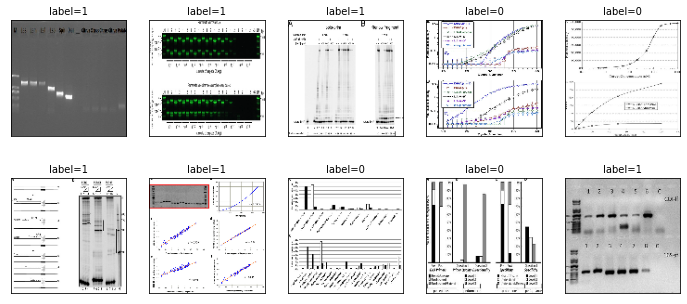

In [138]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

In [139]:
print(type(x_Train))
x_Train=np.array(x_Train)
y_Train=np.array(y_Train)
x_Test=np.array(x_Test)
x_Test=np.array(x_Test)
print(type(x_Train))
x_Train4D=x_Train.reshape(x_Train.shape[0],125,125,3).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],125,125,3).astype('float32')
x_Train4D=np.delete(x_Train4D, [1,2], axis=3)
x_Test4D=np.delete(x_Test4D, [1,2], axis=3)
x_Train=np.delete(x_Train, [1,2], axis=3)
x_Test=np.delete(x_Test, [1,2], axis=3)
x_Train4D_normalize = x_Train / 255
x_Test4D_normalize = x_Test / 255
x_Train4D_normalize.shape
from keras.utils import np_utils
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

<class 'list'>
<class 'numpy.ndarray'>


In [140]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [141]:
model = Sequential()
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(125,125,1), 
                 activation='relu'))
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))
# 平坦化
model.add(Flatten())
model.add(Dense(128, activation='relu'))#回歸用
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))#分類用
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #sparse_categorical_crossentropy categorical_crossentropy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 125, 125, 16)      416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 36)        14436     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 36)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 36)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 34596)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               4428416   
__________

In [100]:
#Model訓練
train_history=model.fit(x=x_Train4D_normalize, y=y_TrainOneHot,validation_split=0.2, epochs=100, batch_size=100,verbose=2)
#存model
# model.save(model_path+"detect_model.h5") #face_weight.h5/face_weight_4.h5 face_weight_418

Train on 90 samples, validate on 23 samples
Epoch 1/100
 - 1s - loss: 0.2676 - acc: 0.8667 - val_loss: 0.7503 - val_acc: 0.5217
Epoch 2/100
 - 1s - loss: 0.3874 - acc: 0.8111 - val_loss: 1.1221 - val_acc: 0.5652
Epoch 3/100
 - 1s - loss: 0.4197 - acc: 0.8222 - val_loss: 1.1345 - val_acc: 0.5217
Epoch 4/100
 - 1s - loss: 0.4248 - acc: 0.7889 - val_loss: 0.8277 - val_acc: 0.6087
Epoch 5/100
 - 1s - loss: 0.2797 - acc: 0.8556 - val_loss: 0.6521 - val_acc: 0.5652
Epoch 6/100
 - 1s - loss: 0.2054 - acc: 0.9333 - val_loss: 0.7225 - val_acc: 0.5217
Epoch 7/100
 - 1s - loss: 0.2984 - acc: 0.9000 - val_loss: 0.6898 - val_acc: 0.6522
Epoch 8/100
 - 1s - loss: 0.2148 - acc: 0.9444 - val_loss: 0.6971 - val_acc: 0.5652
Epoch 9/100
 - 1s - loss: 0.1560 - acc: 0.9778 - val_loss: 0.8456 - val_acc: 0.6522
Epoch 10/100
 - 1s - loss: 0.2353 - acc: 0.8889 - val_loss: 0.7523 - val_acc: 0.6522
Epoch 11/100
 - 1s - loss: 0.1298 - acc: 0.9556 - val_loss: 0.7831 - val_acc: 0.6522
Epoch 12/100
 - 1s - loss: 0.1

In [101]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder

prediction_proba=model.predict(x_Test4D_normalize)
prediction = argmax(prediction_proba,axis=1)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_Test, prediction))

              precision    recall  f1-score   support

           0       0.39      0.71      0.50        17
           1       0.72      0.41      0.52        32

    accuracy                           0.51        49
   macro avg       0.55      0.56      0.51        49
weighted avg       0.61      0.51      0.51        49

